<a href="https://colab.research.google.com/github/melvinps/Schindler-Data-Analysis/blob/main/Callback_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **IMPORT DATA**

Select Route by entering respectively location (eg. D01, e02)

---

Select Month by entering month number (eg. **4** for april, **5** for may)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from collections import defaultdict

%load_ext google.colab.data_table
%matplotlib inline

In [2]:
df = pd.read_excel('2021 04 28 Daily Callbacks.xlsx')

In [3]:
df = df[['Location','Notification date','Name','Description of technical object','Description','Long Text Description']].dropna()

In [4]:
df['Notification date'] = pd.to_datetime(df['Notification date'])

**Skip if do not want to filter by routes or date**

In [76]:
route = input('Enter Route: ')
route = '808' + route.upper()
print('Route: ' + route)

Enter Route: d02
Route: 808D02


In [6]:
m = input('Enter the month of notification date: ')
print('Month selected: ' + m)


Enter the month of notification date: 4
Month selected: 4


In [7]:
pass_month = []

count = int(m)
while count > 1:
  pass_month.append(str(count))  
  count = count - 1

pass_month

['4', '3', '2']

In [77]:
df_route_sick = df.loc[(df['Location'] == route) & (df['Notification date'].dt.month == int(m))]
df_route = df.loc[(df['Location'] == route)]
df_route_date = df_route.loc[df_route['Notification date'].dt.month == int(m)]
df_route_pass_month = df_route.loc[(df_route['Notification date'].dt.month).isin(pass_month)]
df_route_pass_month

,Location,Notification date,Name,Description of technical object,Description,Long Text Description
725,808D02,2021-04-22,CAIRNHILL PLAZA (MCST 409),PL3,Replaced cop no 9 button.,Replaced cop no 9 button.
726,808D02,2021-02-13,CAIRNHILL PLAZA (MCST 409),PL7,"Check drive error, reboot the system li»","Check drive error, reboot the system lift back..."
727,808D02,2021-02-14,CAIRNHILL PLAZA (MCST 409),PL7,Check and replaced PIOVECL 3 print rela»,Check and replaced PIOVECL 3 print relay 2 pcs...
728,808D02,2021-02-15,CAIRNHILL PLAZA (MCST 409),PL7,Check and replaced capacitor and monito»,Check and replaced capacitor Check and replace...
729,808D02,2021-04-12,CAIRNHILL PLAZA (MCST 409),SL4,Need to follow up check cop button func»,Need to follow up check cop button function.
...,...,...,...,...,...,...
1131,808D02,2021-03-29,225C QUEEN STREET,PL1,Building side main incoming supply brea»,Building side main incoming supply breaker (to...
1132,808D02,2021-04-17,225C QUEEN STREET,PL1,Building main breaker trip. Reset,Building main breaker trip. Reset
1133,808D02,2021-03-29,225C QUEEN STREET,EL1,Building side main incoming supply brea»,Building side main incoming supply breaker (to...
1134,808D02,2021-04-26,KWONG WAI SHIU HOSPITAL,BL01,Release 1 pax at 12:14. KOKB error. Che»,Release 1 pax at 12:14. KOKB error. Check card...


## **TOP 10 SITES WITH HIGHEST CALLBACK IN PASS 3 MONTHS**


In [78]:
top = df_route_pass_month.drop(['Notification date','Location','Long Text Description','Description of technical object'], axis=1)
top.rename({'Description': 'Numbers of Callbacks'}, axis=1, inplace=True)
top.groupby(['Name']).count().sort_values(by=['Numbers of Callbacks'], ascending= False)[0:10]
top_10 = top.groupby(['Name']).count().sort_values(by=['Numbers of Callbacks'], ascending= False)[0:10].reset_index()
top_10

,Name,Numbers of Callbacks
0,ION ORCHARD,37
1,CT HUB 2,18
2,MOUNT ELIZABETH NOVENA HOSPITAL,16
3,"MINISTRY OF HOME AFFAIRS, SECTOR B",12
4,RIVERSIDE POINT,10
5,ORCHARD CENTRAL,10
6,PEACE MANSION (MCST 686),9
7,COMCENTRE,8
8,"INSPIRA CONDOMINIUM, THE (75-INSPIR",7
9,STURDEE RESIDENCES CONDO,7


### **Visualization**

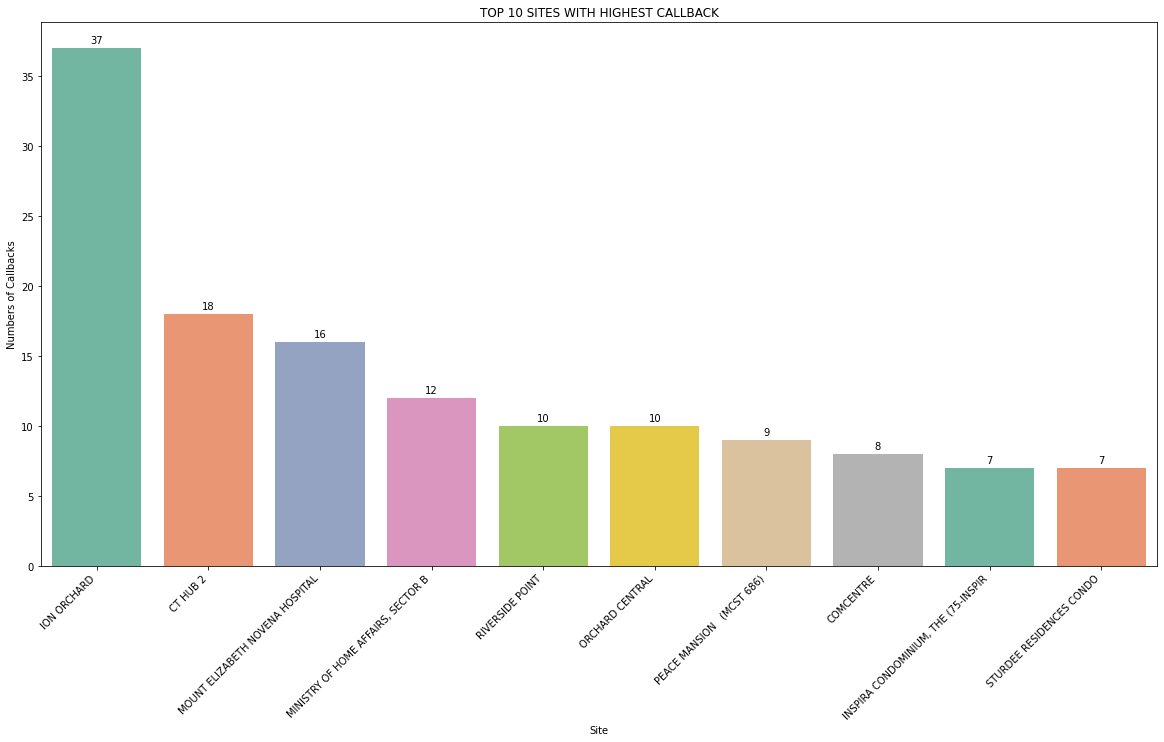

In [79]:
# g = sns.catplot(x="Name", y='Numbers of Callbacks',data=top_10, kind="bar", aspect=1.5)
# plt.xticks(rotation=45, ha='right')
fig, ax = plt.subplots(figsize=(20,10))
g =sns.barplot(x='Name',y='Numbers of Callbacks',data=top_10,ax=ax, palette='Set2')
plt.xticks(rotation=45, ha='right')
g.set_xlabel('Site')
g.set_title('TOP 10 SITES WITH HIGHEST CALLBACK')

for p in g.patches:
    g.annotate('{:.0f}'.format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha = 'center', va = 'center', 
                   xytext = (0, 8), 
                   textcoords = 'offset points')

# **LIFT WITH HIGHEST CALLBACK IN PASS 3 MONTHS**

In [80]:
top_lift = df_route_pass_month.drop(['Notification date','Location','Long Text Description'], axis=1)
top_lift.rename({'Description': 'Numbers of Callbacks', 'Description of technical object':'Lift'}, axis=1, inplace=True)
top_lift.groupby(['Name','Lift']).count().sort_values(by=['Numbers of Callbacks'], ascending= False)[0:20]


Numbers of Callbacks
Name                                Lift                         
ION ORCHARD                         FL1                         8
                                    PL/PL3                      7
MINISTRY OF HOME AFFAIRS, SECTOR B  PL3 (C)                     7
RIVERSIDE POINT                     OL01                        7
PEACE MANSION   (MCST 686)          PF A                        6
SCHOOL OF THE ARTS SINGAPORE        GL1                         6
ION ORCHARD                         PL/PL1                      5
PARK REGIS SINGAPORE                FL1                         5
CT HUB 2                            SL02                        5
SETIA RESIDENCES                    PL1                         5
SHAN GATE APARTMENT (MCST 1696)     PL01                        4
100 ROBERTSON QUAY                  PL4                         4
PEOPLE'S ASSOCIATION HQ             PL2                         4
ION ORCHARD                         PO/PL4                      3
CT HUB 2                            SL01                        3
PARC CENTENNIAL (99-KAMPONG JAVA)   PL2                         3
ION ORCHARD                         PO/PL6                      3
ORCHARD CENTRAL                     VL1                         3
GAMBIER COURT                       PL2                         3
INSPIRA CONDOMINIUM, THE (75-INSPIR PL2                         3

# **SICK UNIT**

In [81]:
if route == '808':
  df_sick = df
else:
  df_sick = df_route_sick


df_sick.groupby(['Location','Name','Description of technical object']).count()
df_sick['No. of Callbacks'] = df_sick.groupby(['Location','Name','Description of technical object'])['Notification date'].transform('count')
df_sick = df_sick[df_sick['No. of Callbacks']>=3] 
df_sick_No_des = df_sick.drop(['Notification date','Description','Long Text Description'], axis=1)
df_sick_No_des.groupby(['Location','Name','Description of technical object'],as_index = 'Location').count()



# pd.set_option("display.max_rows", None, "display.max_columns", None)
# print()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


No. of Callbacks
Location Name                         Description of technical object                  
808D02   CT HUB 2                     PL05                                            3
                                      SL02                                            3
         ION ORCHARD                  FL1                                             5
                                      PL/PL3                                          4
         ROSEVALE                     PL2                                             3
         SCHOOL OF THE ARTS SINGAPORE GL1                                             5

**Show Error Description**

In [ ]:
df_sick_with_des = df_sick.drop(['Notification date','Description'], axis=1)
df_sick_with_des.groupby(['Location','Name','Description of technical object','Long Text Description'],as_index = 'Location').count()#.sort_values(by=['No. of Callbacks'],ascending=False)

# **Visualization**

In [ ]:
df_v = df_route 
df_v['Month'] = df['Notification date'].dt.month
df_v = df_v.drop(['Notification date', 'Long Text Description','Location'], axis=1)
df_v.groupby(['Name','Description of technical object','Month']).count()
temp = df_v.groupby(['Name','Description of technical object','Month']).count().reset_index()
temp1 = temp.iloc[0:20]
temp1


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Name,Description of technical object,Month,Description
0,100 ROBERTSON QUAY,FL3,1,3
1,100 ROBERTSON QUAY,FL3,2,1
2,100 ROBERTSON QUAY,FL5,4,1
3,100 ROBERTSON QUAY,FL7,1,1
4,100 ROBERTSON QUAY,PL4,1,4
5,100 ROBERTSON QUAY,PL4,2,3
6,100 ROBERTSON QUAY,PL4,3,1
7,100 ROBERTSON QUAY,PL6,1,2
8,100 ROBERTSON QUAY,PL6,2,1
9,113 SYED ALWI ROAD,PL1,3,1


In [ ]:
# df_v.groupby(['Name','Description of technical object','Month']).count().plot(kind='bar',figsize=(100, 50) )


In [ ]:
# df_route_date = df_route.loc[df_route['Notification date'].dt.month == int(m)]
# df_route_date = df_route_date.sort_values(by='Notification date')
# temp = df_route_date.drop(['Location', 'Notification date','Long Text Description'], axis=1)
# temp.groupby(['Name','Description of technical object']).count()


In [ ]:
ax = sns.catplot(x='Description of technical object', y='Description', hue='Month', col='Name', data=temp1, kind='bar')
